In [10]:
import numpy as np
import pandas as pd

In [11]:
ORIGINAL = pd.read_csv('/kaggle/input/original/Actual-healthcare-dataset-stroke-data.csv')
len(ORIGINAL)

43400

In [12]:
ORIGINAL = ORIGINAL[ORIGINAL['gender'] != 'Other']
len(ORIGINAL)

43389

In [13]:
TEST_DATASET = pd.read_csv('/kaggle/input/stroke-dataset/healthcare-dataset-stroke-data.csv')
len(TEST_DATASET)

5110

In [14]:
TEST_DATASET = TEST_DATASET[TEST_DATASET['gender'] != 'Other']
len(TEST_DATASET)

5109

In [15]:
ORIGINAL['stroke'].value_counts()

stroke
0    42606
1      783
Name: count, dtype: int64

In [16]:
class_0 = ORIGINAL[ORIGINAL['stroke'] == 0].sample(n=783, random_state=42)
class_1 = ORIGINAL[ORIGINAL['stroke'] == 1]

balanced_df = pd.concat([class_0, class_1])
balanced_df = balanced_df.sample(frac=1, random_state=42).reset_index(drop=True)

print(balanced_df['stroke'].value_counts())

stroke
0    783
1    783
Name: count, dtype: int64


In [17]:
# if 'id' in ORIGINAL.columns and 'id' in TEST_DATASET.columns:
#     ORIGINAL = ORIGINAL[~ORIGINAL['id'].isin(TEST_DATASET['id'])]
# else:
#     ORIGINAL = ORIGINAL[~ORIGINAL.index.isin(TEST_DATASET.index)]

In [18]:
ORIGINAL=balanced_df

In [19]:
ORIGINAL = ORIGINAL.drop(columns=['id'],axis=0)

In [20]:
ORIGINAL.shape

(1566, 11)

In [21]:
43400-38290

5110

In [22]:
ORIGINAL.head(7)

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,Female,39.0,0,0,Yes,Private,Rural,91.62,21.6,NaN,0
1,Female,62.0,0,0,Yes,Private,Urban,114.41,32.5,never smoked,0
2,Female,78.0,0,1,Yes,Self-employed,Rural,96.97,34.8,never smoked,1
3,Female,79.0,1,1,Yes,Private,Rural,82.85,NaN,NaN,1
4,Female,72.0,0,0,Yes,Private,Rural,107.61,32.4,never smoked,0
5,Female,38.0,0,1,Yes,Private,Urban,65.99,23.1,formerly smoked,1
6,Male,64.0,0,0,Yes,Self-employed,Urban,80.84,21.1,smokes,0


In [23]:
TEST_DATASET['stroke'].value_counts(),ORIGINAL['stroke'].value_counts()

(stroke
 0    4860
 1     249
 Name: count, dtype: int64,
 stroke
 0    783
 1    783
 Name: count, dtype: int64)

In [24]:
len(ORIGINAL)

1566

In [25]:
for i in ORIGINAL.columns:
    print(f"{i}:\t",ORIGINAL[i].nunique())

gender:	 2
age:	 97
hypertension:	 2
heart_disease:	 2
ever_married:	 2
work_type:	 5
Residence_type:	 2
avg_glucose_level:	 1454
bmi:	 320
smoking_status:	 3
stroke:	 2


In [26]:
cat_col = ['gender' ,'ever_married','work_type','Residence_type','smoking_status']
num_col = ['age', 'hypertension', 'heart_disease','avg_glucose_level', 'bmi']
for i in cat_col:
    print(f"{i}:",ORIGINAL[i].value_counts())
    print()

gender: gender
Female    900
Male      666
Name: count, dtype: int64

ever_married: ever_married
Yes    1212
No      354
Name: count, dtype: int64

work_type: work_type
Private          896
Self-employed    368
Govt_job         182
children         116
Never_worked       4
Name: count, dtype: int64

Residence_type: Residence_type
Urban    796
Rural    770
Name: count, dtype: int64

smoking_status: smoking_status
never smoked       573
formerly smoked    341
smokes             262
Name: count, dtype: int64



In [27]:
ORIGINAL.describe()

,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
count,1566.000000,1566.000000,1566.000000,1566.000000,1403.000000,1566.00000
mean,54.963729,0.170498,0.137931,116.470415,29.257234,0.50000
std,22.459917,0.376190,0.344938,53.174103,7.285424,0.50016
min,0.080000,0.000000,0.000000,55.010000,13.100000,0.00000
25%,40.000000,0.000000,0.000000,78.820000,24.400000,0.00000
50%,60.000000,0.000000,0.000000,96.095000,28.400000,0.50000
75%,74.000000,0.000000,0.000000,136.592500,33.100000,1.00000
max,82.000000,1.000000,1.000000,271.740000,68.000000,1.00000


In [28]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
DT_bmi_pipe=Pipeline(steps=[("scale",StandardScaler()),("dtr",DecisionTreeRegressor())])
X=ORIGINAL[["gender","age","bmi"]].copy()

In [29]:
X.gender=X.gender.replace({"Male":0,"Female":1,"Other":-1}).astype(np.uint8)

In [30]:
missing=X[X.bmi.isna()]
X=X[~X.bmi.isna()]
y=X.pop("bmi")
DT_bmi_pipe.fit(X,y)

Pipeline(steps=[('scale', StandardScaler()), ('dtr', DecisionTreeRegressor())])

In [31]:
predicted_bmi=pd.Series(DT_bmi_pipe.predict(missing[["gender","age"]]),index=missing.index)
ORIGINAL.loc[missing.index,"bmi"]=predicted_bmi

In [32]:
ORIGINAL['bmi'] = ORIGINAL['bmi'].round(3)

In [33]:
ORIGINAL.isna().sum()

gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                    0
smoking_status       390
stroke                 0
dtype: int64

In [34]:
ORIGINAL.head(5)

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,Female,39.0,0,0,Yes,Private,Rural,91.62,21.600,NaN,0
1,Female,62.0,0,0,Yes,Private,Urban,114.41,32.500,never smoked,0
2,Female,78.0,0,1,Yes,Self-employed,Rural,96.97,34.800,never smoked,1
3,Female,79.0,1,1,Yes,Private,Rural,82.85,26.826,NaN,1
4,Female,72.0,0,0,Yes,Private,Rural,107.61,32.400,never smoked,0


In [35]:
data = ORIGINAL.copy()

In [36]:
data['stroke'].value_counts()

stroke
0    783
1    783
Name: count, dtype: int64

In [37]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder() 
gender = le.fit_transform(data['gender'])
ever_married = le.fit_transform(data['ever_married'])
Residence_type = le.fit_transform(data['Residence_type'])
work_type = le.fit_transform(data['work_type'])
smoking_status = le.fit_transform(data['smoking_status'])


In [38]:
print("Class labels:", le.classes_)

for original, encoded in zip(le.classes_, range(len(le.classes_))):
    print(f"{original} => {encoded}")

Class labels: ['formerly smoked' 'never smoked' 'smokes' nan]
formerly smoked => 0
never smoked => 1
smokes => 2
nan => 3


In [39]:
data['work_type'] = work_type
data['gender'] = gender
data['Residence_type'] = Residence_type
data['ever_married'] = ever_married
data['smoking_status'] = smoking_status

In [40]:
data['gender'].value_counts()

gender
0    900
1    666
Name: count, dtype: int64

In [41]:
# import pandas as pd
# category_order = np.array(['nan', 'never smoked' ,'formerly smoked', 'smokes'])
# label_encoder = LabelEncoder()
# label_encoder.classes_ = category_order
# data['smoking_status'] = label_encoder.transform(ORIGINAL['smoking_status'])

In [42]:
data.head()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,0,39.0,0,0,1,2,0,91.62,21.600,3,0
1,0,62.0,0,0,1,2,1,114.41,32.500,1,0
2,0,78.0,0,1,1,3,0,96.97,34.800,1,1
3,0,79.0,1,1,1,2,0,82.85,26.826,3,1
4,0,72.0,0,0,1,2,0,107.61,32.400,1,0


In [43]:
import seaborn as sns
from matplotlib import pyplot as plt

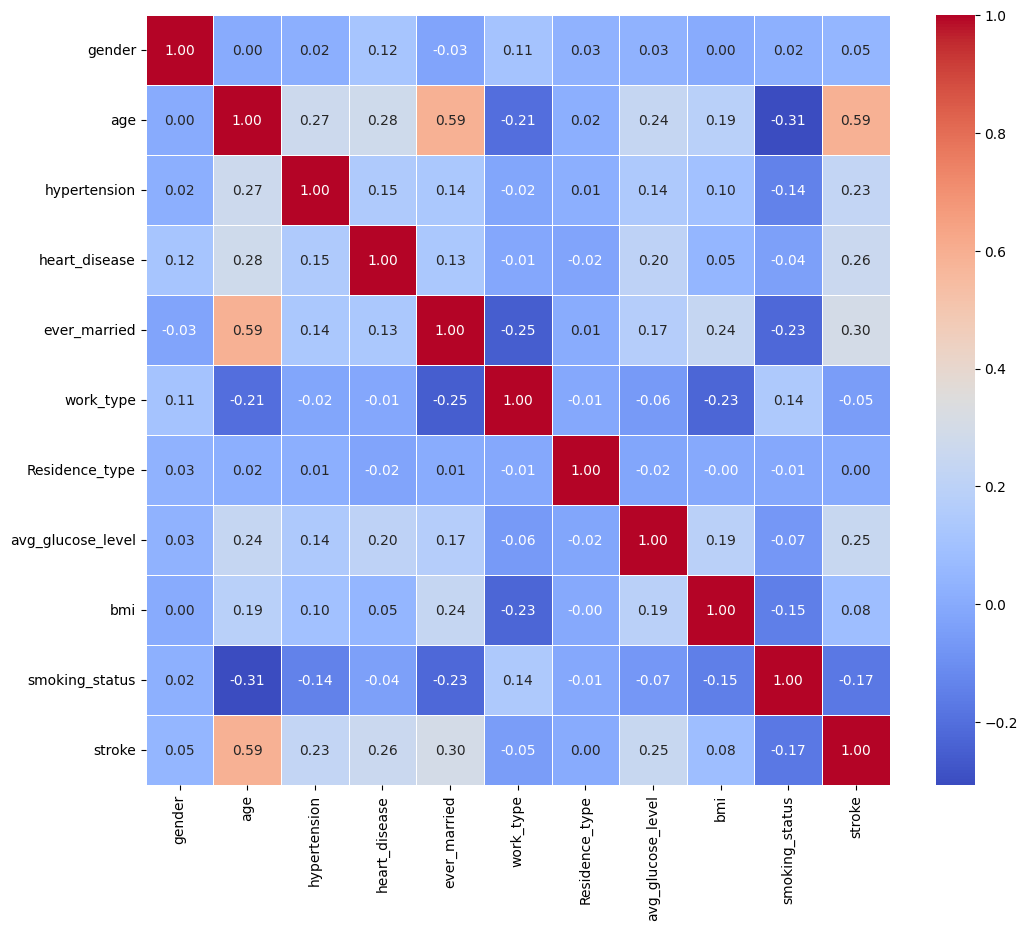

In [44]:
correlation_matrix = data.corr()
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.show()

In [45]:
# data.drop(columns=['id'],axis=0,inplace=True)

In [46]:
X = data.drop('stroke', axis = 1)
Y = data['stroke']
Y = pd.DataFrame(Y)

In [47]:

from imblearn.over_sampling import SMOTE
smote = SMOTE(random_state = 42)
X1, Y1 = smote.fit_resample(X, Y)

In [48]:
Y.value_counts(),Y1.value_counts()

(stroke
 0         783
 1         783
 Name: count, dtype: int64,
 stroke
 0         783
 1         783
 Name: count, dtype: int64)

In [49]:
X.shape,X1.shape

((1566, 10), (1566, 10))

In [50]:
Y1.value_counts()

stroke
0         783
1         783
Name: count, dtype: int64

In [51]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,Y,test_size=0.4 ,random_state = 13, stratify=Y)

In [52]:
y_train.value_counts(),y_test.value_counts()

(stroke
 1         470
 0         469
 Name: count, dtype: int64,
 stroke
 0         314
 1         313
 Name: count, dtype: int64)

In [53]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, roc_auc_score, confusion_matrix, roc_curve
from sklearn.utils import resample
import xgboost as xgb
import matplotlib.pyplot as plt
import seaborn as sns

In [54]:
data.columns

Index(['gender', 'age', 'hypertension', 'heart_disease', 'ever_married',
       'work_type', 'Residence_type', 'avg_glucose_level', 'bmi',
       'smoking_status', 'stroke'],
      dtype='object')

# Random Forest

In [55]:
RF = RandomForestClassifier(n_estimators=1000, random_state=47 , n_jobs = 3)
RF.fit(X_train,y_train)
Y_Res_RF=RF.predict(X_test)
RF_Accuracy = accuracy_score(y_test, Y_Res_RF)
print(RF_Accuracy*100,'%')

<ipython-input-55-37d56dcb5784>:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  RF.fit(X_train,y_train)


77.67145135566189 %


In [56]:
CM = confusion_matrix(y_test, Y_Res_RF)
print(CM)
print("True Positives : " , CM[1][1])
print("True Negatives : " , CM[0][0])
print("False Positives : " , CM[0][1])
print("False Negatives : " , CM[1][0])

[[224  90]
 [ 50 263]]
True Positives :  263
True Negatives :  224
False Positives :  90
False Negatives :  50


In [57]:
print(classification_report(y_test, Y_Res_RF))
print("specificity =", CM[0][0]/(CM[0][0]+CM[0][1]))

              precision    recall  f1-score   support

           0       0.82      0.71      0.76       314
           1       0.75      0.84      0.79       313

    accuracy                           0.78       627
   macro avg       0.78      0.78      0.78       627
weighted avg       0.78      0.78      0.78       627

specificity = 0.7133757961783439


In [58]:
y_score_RF = RF.predict_proba(X_test)[:,1]
false_positive_rate_RF, true_positive_rate_RF, threshold_RF = roc_curve(y_test, y_score_RF)
print('roc_auc_score for RANDOM FOREST is: ', roc_auc_score(y_test, y_score_RF))

roc_auc_score for RANDOM FOREST is:  0.8393907327893205


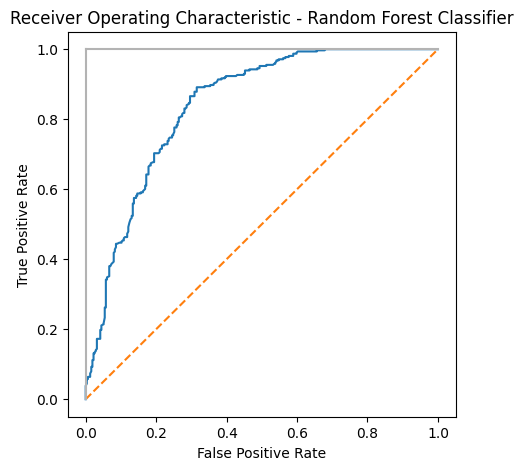

In [59]:
plt.figure(figsize=(5,5))
plt.title('Receiver Operating Characteristic - Random Forest Classifier')
plt.plot(false_positive_rate_RF, true_positive_rate_RF)
plt.plot([0, 1], ls="--")
plt.plot([0, 0], [1, 0] , c=".7"), plt.plot([1, 1] , c=".7")
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

# XG Boost

In [60]:
from xgboost import XGBClassifier
XG_classifier = XGBClassifier()
XG_classifier.fit(X_train,y_train)
Y_pred_xg = XG_classifier.predict(X_test)
XG_Accuracy = accuracy_score(y_test,Y_pred_xg)
print(XG_Accuracy*100,"%")

75.11961722488039 %


In [61]:
features = X_train.columns
importances = XG_classifier.feature_importances_
print(features)
print(importances)

Index(['gender', 'age', 'hypertension', 'heart_disease', 'ever_married',
       'work_type', 'Residence_type', 'avg_glucose_level', 'bmi',
       'smoking_status'],
      dtype='object')
[0.07851617 0.25084037 0.07989854 0.15844518 0.08635036 0.08619189
 0.06295387 0.06828302 0.06433201 0.06418855]


In [62]:
imp_feature_xg = {'features' : ['age','Residence_type', 'gender','hypertension','work_type','heart_disease','smoking_status','ever_married','bmi', 'avg_glucose_level'] , 'values' :importances}
imp_feature_xg = pd.DataFrame(imp_feature_xg)

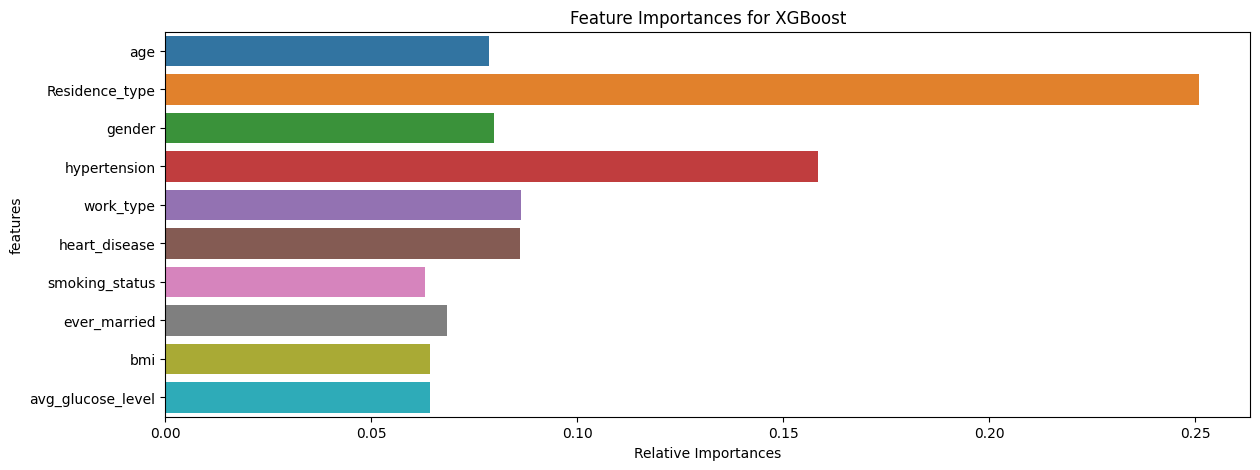

In [63]:
plt.figure(figsize = (14, 5))
bargraph = sns.barplot(x=imp_feature_xg['values'], y = imp_feature_xg['features'], data=imp_feature_xg)
plt.xlabel('Relative Importances')
plt.title("Feature Importances for XGBoost")
plt.show()

In [64]:
CM = confusion_matrix(y_test, Y_pred_xg)
print(CM)
print("True Positives : " , CM[1][1])
print("True Negatives : " , CM[0][0])
print("False Positives : " , CM[0][1])
print("False Negatives : " , CM[1][0])

print("\n", classification_report(y_test, Y_pred_xg))
print("specificity =", CM[0][0]/(CM[0][0]+CM[0][1]))

[[226  88]
 [ 68 245]]
True Positives :  245
True Negatives :  226
False Positives :  88
False Negatives :  68

               precision    recall  f1-score   support

           0       0.77      0.72      0.74       314
           1       0.74      0.78      0.76       313

    accuracy                           0.75       627
   macro avg       0.75      0.75      0.75       627
weighted avg       0.75      0.75      0.75       627

specificity = 0.7197452229299363


In [65]:
y_score_xg = XG_classifier.predict_proba(X_test)[:,1]
false_positive_rate_XG, true_positive_rate_XG, threshold_XG = roc_curve(y_test, y_score_xg)
print('roc_auc_score for XGBoost is: ', roc_auc_score(y_test, y_score_xg))

roc_auc_score for XGBoost is:  0.8203231517470138


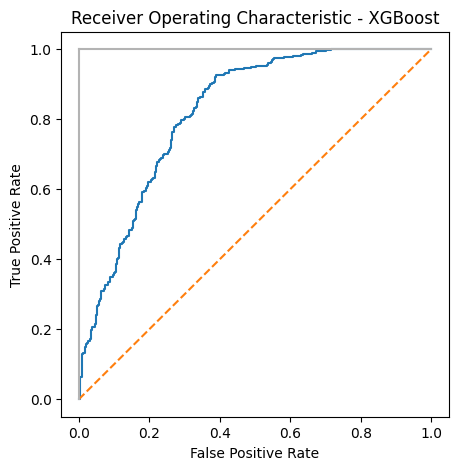

In [66]:
plt.figure(figsize=(5,5))
plt.title('Receiver Operating Characteristic - XGBoost')
plt.plot(false_positive_rate_XG, true_positive_rate_XG)
plt.plot([0, 1], ls="--")
plt.plot([0, 0], [1, 0] , c=".7"), plt.plot([1, 1] , c=".7")
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

---

<ipython-input-73-facb110d4065>:9: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf_model.fit(X_train, y_train)
/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_label.py:99: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_label.py:134: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, dtype=self.classes_.dtype, warn=True)


Random Forest Accuracy: 0.777
Random Forest Precision: 0.745
Random Forest Recall: 0.840
Random Forest F1 Score: 0.790
Random Forest AUC-ROC: 0.839

XGBoost Accuracy: 0.751
XGBoost Precision: 0.736
XGBoost Recall: 0.783
XGBoost F1 Score: 0.759
XGBoost AUC-ROC: 0.820

Voting Classifier Accuracy: 0.758
Voting Classifier Precision: 0.736
Voting Classifier Recall: 0.802
Voting Classifier F1 Score: 0.768
Voting Classifier AUC-ROC: 0.833


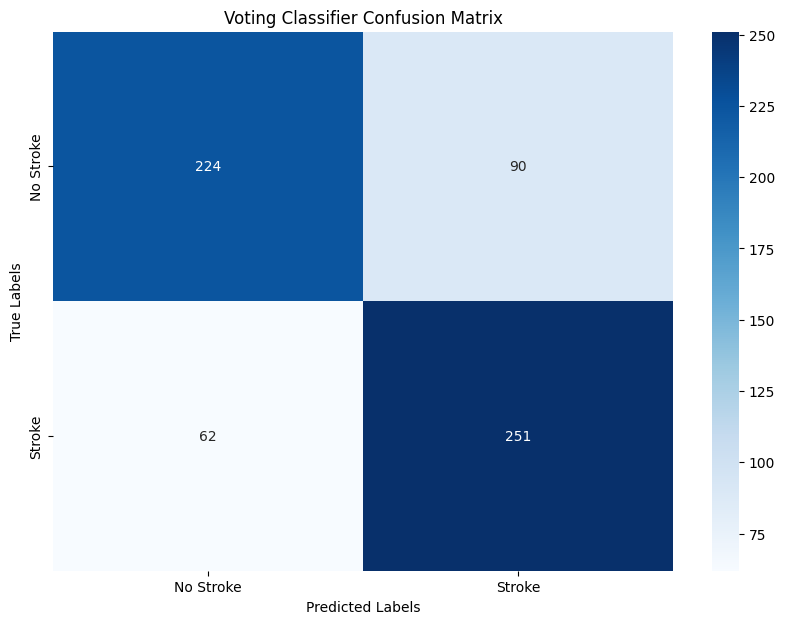

In [73]:
from sklearn.ensemble import VotingClassifier
import xgboost as xgb

rf_model = RF
xgb_model = XG_classifier

voting_model = VotingClassifier(estimators=[('rf', rf_model), ('xgb', xgb_model)], voting='soft')

rf_model.fit(X_train, y_train)
xgb_model.fit(X_train, y_train)
voting_model.fit(X_train, y_train)

rf_pred = rf_model.predict(X_test)
rf_accuracy = accuracy_score(y_test,rf_pred)
rf_precision = classification_report(y_test, rf_pred, output_dict=True)['1']['precision']
rf_recall = classification_report(y_test, rf_pred, output_dict=True)['1']['recall']
rf_f1=classification_report(y_test, rf_pred, output_dict=True)['1']['f1-score']
rf_auc = roc_auc_score(y_test,rf_model.predict_proba(X_test)[:,1]) 


xgb_pred = xgb_model.predict(X_test)
xgb_accuracy = accuracy_score(y_test,xgb_pred)
xgb_accuracy = accuracy_score(y_test,xgb_pred)
xgb_precision = classification_report(y_test, xgb_pred, output_dict=True)['1']['precision']
xgb_recall = classification_report(y_test, xgb_pred, output_dict=True)['1']['recall']
xgb_f1=classification_report(y_test, xgb_pred, output_dict=True)['1']['f1-score']
xgb_auc = roc_auc_score(y_test,xgb_model.predict_proba(X_test)[:,1]) 


voting_pred = voting_model.predict(X_test)
voting_accuracy = accuracy_score(y_test, voting_pred)
voting_precision = classification_report(y_test, voting_pred, output_dict=True)['1']['precision']
voting_recall = classification_report(y_test, voting_pred, output_dict=True)['1']['recall']
voting_f1 = classification_report(y_test, voting_pred, output_dict=True)['1']['f1-score']
voting_auc = roc_auc_score(y_test, voting_model.predict_proba(X_test)[:, 1])

print(f"Random Forest Accuracy: {rf_accuracy:.3f}")
print(f"Random Forest Precision: {rf_precision:.3f}")
print(f"Random Forest Recall: {rf_recall:.3f}")
print(f"Random Forest F1 Score: {rf_f1:.3f}")
print(f"Random Forest AUC-ROC: {rf_auc:.3f}")

print(f"\nXGBoost Accuracy: {xgb_accuracy:.3f}")
print(f"XGBoost Precision: {xgb_precision:.3f}")
print(f"XGBoost Recall: {xgb_recall:.3f}")
print(f"XGBoost F1 Score: {xgb_f1:.3f}")
print(f"XGBoost AUC-ROC: {xgb_auc:.3f}")

print(f"\nVoting Classifier Accuracy: {voting_accuracy:.3f}")
print(f"Voting Classifier Precision: {voting_precision:.3f}")
print(f"Voting Classifier Recall: {voting_recall:.3f}")
print(f"Voting Classifier F1 Score: {voting_f1:.3f}")
print(f"Voting Classifier AUC-ROC: {voting_auc:.3f}")

voting_cm = confusion_matrix(y_test, voting_pred)

plt.figure(figsize=(10, 7))
sns.heatmap(voting_cm, annot=True, fmt='d', cmap='Blues', xticklabels=['No Stroke', 'Stroke'], yticklabels=['No Stroke', 'Stroke'])
plt.title("Voting Classifier Confusion Matrix")
plt.ylabel('True Labels')
plt.xlabel('Predicted Labels')
plt.show()

In [75]:
y_score_vt = voting_model.predict_proba(X_test)[:,1]
false_positive_rate_VT, true_positive_rate_VT, threshold_VT = roc_curve(y_test, y_score_vt)
print('roc_auc_score for VOTING is: ',roc_auc_score(y_test, y_score_vt))

roc_auc_score for VOTING is:  0.8328279847784945


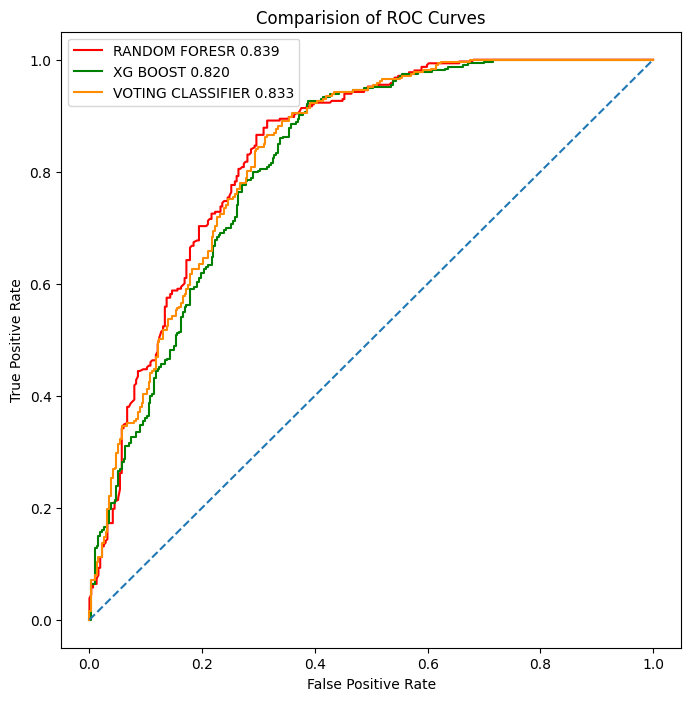

In [76]:
plt.figure(figsize=(8,8))
plt.title('Comparision of ROC Curves')
plt.plot(false_positive_rate_RF, true_positive_rate_RF, color = 'red', label = f'RANDOM FORESR {rf_auc:.3f}')
plt.plot(false_positive_rate_XG, true_positive_rate_XG, color = 'green', label = f'XG BOOST {xgb_auc:.3f}')
plt.plot(false_positive_rate_VT, true_positive_rate_VT, color = 'darkorange', label = f'VOTING CLASSIFIER {voting_auc:.3f}')

plt.plot([0, 1], ls="--")
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.legend()
plt.show()

# hyperTunning

In [ ]:
pip install optuna

In [ ]:
import optuna
def objective(trial):
    rf_n_estimators = trial.suggest_int('rf_n_estimators', 50, 200)  # Random Forest n_estimators
    rf_max_depth = trial.suggest_int('rf_max_depth', 5, 50)  # Random Forest max_depth
    rf_min_samples_split = trial.suggest_int('rf_min_samples_split', 2, 20)  # min_samples_split
    
    xgb_n_estimators = trial.suggest_int('xgb_n_estimators', 50, 200)  # XGBoost n_estimators
    xgb_max_depth = trial.suggest_int('xgb_max_depth', 3, 10)  # XGBoost max_depth
    xgb_learning_rate = trial.suggest_loguniform('xgb_learning_rate', 1e-5, 0.1)  # XGBoost learning_rate

    rf_model = RandomForestClassifier(n_estimators=rf_n_estimators, 
                                      max_depth=rf_max_depth, 
                                      min_samples_split=rf_min_samples_split, 
                                      random_state=42)
    
    xgb_model = xgb.XGBClassifier(n_estimators=xgb_n_estimators, 
                                  max_depth=xgb_max_depth, 
                                  learning_rate=xgb_learning_rate, 
                                  random_state=42)
    
    voting_model = VotingClassifier(estimators=[('rf', rf_model), ('xgb', xgb_model)], voting='soft')    
    voting_model.fit(X_train, y_train)
    voting_pred = voting_model.predict(X_test)
    accuracy = accuracy_score(y_test, voting_pred)
    
    return accuracy

In [ ]:
study = optuna.create_study(direction='maximize')  
study.optimize(objective, n_trials=100)  

In [ ]:

best_params = study.best_trial.params
print(f'Best parameters: {best_params}')

rf_model = RandomForestClassifier(
    n_estimators=best_params['rf_n_estimators'],
    max_depth=best_params['rf_max_depth'],
    min_samples_split=best_params['rf_min_samples_split'],
    random_state=42
)

xgb_model = xgb.XGBClassifier(
    n_estimators=best_params['xgb_n_estimators'],
    max_depth=best_params['xgb_max_depth'],
    learning_rate=best_params['xgb_learning_rate'],
    random_state=42
)

voting_model = VotingClassifier(estimators=[('rf', rf_model), ('xgb', xgb_model)], voting='soft')

voting_model.fit(X_train, y_train)

In [ ]:
voting_pred_tuned = voting_model.predict(X_test)
voting_accuracy_tuned = accuracy_score(y_test, voting_pred_tuned)
voting_precision_tuned = classification_report(y_test, voting_pred_tuned, output_dict=True)['1']['precision']
voting_recall_tuned = classification_report(y_test, voting_pred_tuned, output_dict=True)['1']['recall']
voting_f1_tuned = classification_report(y_test, voting_pred_tuned, output_dict=True)['1']['f1-score']
voting_auc_tuned = roc_auc_score(y_test, voting_model.predict_proba(X_test)[:, 1])


print(f"Voting Classifier Tuned Accuracy: {voting_accuracy_tuned:.3f}")
print(f"Voting Classifier Tuned Precision: {voting_precision_tuned:.3f}")
print(f"Voting Classifier Tuned Recall: {voting_recall_tuned:.3f}")
print(f"Voting Classifier Tuned F1 Score: {voting_f1_tuned:.3f}")
print(f"Voting Classifier Tuned AUC-ROC: {voting_auc_tuned:.3f}")

In [ ]:
from sklearn.metrics import classification_report
voting_report_tuned = classification_report(y_test, voting_pred_tuned)
print("Classification Report for Tuned Voting Classifier:")
print(voting_report_tuned)

In [71]:
import joblib
joblib.dump(voting_model, 'Stroke_model.joblib')

['Stroke_model.joblib']

# CHECKING MODEL ON TEST_DATASET DATASET

In [72]:
loaded_model = joblib.load('/kaggle/working/Stroke_model.joblib')


In [ ]:
TEST_DATASET.shape

In [ ]:
TEST_DATASET.isna().sum()

In [ ]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
X=TEST_DATASET[["gender","age","bmi"]].copy()
X.gender=X.gender.replace({"Male":0,"Female":1}).astype(np.uint8)

In [ ]:
TEST_DATASET.shape

In [ ]:
X.isna().sum()

In [ ]:
TEST_DATASET.isna().sum()

In [ ]:
missing=X[X.bmi.isna()]
predicted_bmi=pd.Series(DT_bmi_pipe.predict(missing[["gender","age"]]),index=missing.index)

In [ ]:
TEST_DATASET.loc[missing.index,"bmi"]=predicted_bmi

In [ ]:
TEST_DATASET.isna().sum()

In [ ]:
TEST_DATASET = TEST_DATASET.drop(columns=['id'],axis=0)

In [ ]:
TEST_DATASET['bmi'].isna().sum()

In [ ]:
TEST_DATASET

In [ ]:
TEST_DATASET['smoking_status'] = TEST_DATASET['smoking_status'].replace('Unknown', np.nan)

In [ ]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder() 
gender = le.fit_transform(TEST_DATASET['gender'])
ever_married = le.fit_transform(TEST_DATASET['ever_married'])
Residence_type = le.fit_transform(TEST_DATASET['Residence_type'])
work_type = le.fit_transform(TEST_DATASET['work_type'])
smoking_status = le.fit_transform(TEST_DATASET['smoking_status'])

In [ ]:
print("Class labels:", le.classes_)

for original, encoded in zip(le.classes_, range(len(le.classes_))):
    print(f"{original} => {encoded}")

In [ ]:
TEST_DATASET['work_type'] = work_type
TEST_DATASET['gender'] = gender
TEST_DATASET['Residence_type'] = Residence_type
TEST_DATASET['ever_married'] = ever_married
TEST_DATASET['smoking_status'] = smoking_status

In [ ]:
TEST_DATASET['bmi'] = TEST_DATASET['bmi'].round(3)

In [ ]:
TEST_DATASET

In [ ]:
data['gender'].value_counts(),TEST_DATASET['gender'].value_counts()

In [ ]:
TEST_DATASET.info()

In [ ]:
data.info()

In [ ]:
data['stroke'].value_counts()

In [ ]:
common_rows = pd.merge(data, TEST_DATASET, how='inner')
len(common_rows)

In [ ]:
len(data),len(TEST_DATASET)

In [ ]:
stroked = TEST_DATASET[TEST_DATASET['stroke']==1] #249
common = pd.merge(stroked,data, how='inner') # 249
len(stroked),len(common)

In [ ]:
common

In [ ]:
data1 = data[data['stroke']==1]
len(data1)

In [ ]:
len(pd.merge(stroked,data1, how='inner'))

In [ ]:
uncommon = pd.merge(stroked,data1,how='outer')
len(uncommon)

In [ ]:
len(pd.merge(data,stroked,how='inner'))

In [ ]:
X_TEST_DATASET = TEST_DATASET.drop(columns=['stroke'],axis=1)
y_TEST_DATASET = TEST_DATASET['stroke']
# X_TEST_DATASET = stroked.drop(columns=['stroke'],axis=0)
# y_TEST_DATASET = stroked['stroke']

In [ ]:
voting_model

In [ ]:
X_TEST_DATASET

In [ ]:
predictions = voting_model.predict(X_TEST_DATASET)

In [ ]:
from sklearn.metrics import accuracy_score, f1_score, classification_report, roc_auc_score
from sklearn.pipeline import Pipeline

accuracy = accuracy_score(y_TEST_DATASET, predictions)
f1 = f1_score(y_TEST_DATASET, predictions)
roc_auc = roc_auc_score(y_TEST_DATASET, voting_model.predict_proba(X_TEST_DATASET)[:, 1])

print(f'Accuracy: {accuracy}')
print(f'F1-Score: {f1}')
print(f'ROC-AUC: {roc_auc}')
print('Classification Report:')
print(classification_report(y_TEST_DATASET, predictions))

In [ ]:
TEST_DATASET['stroke'].value_counts()

In [ ]:
ck =TEST_DATASET[TEST_DATASET['stroke']==1]
ck

In [ ]:
ch = data[data['stroke']==1]
ch

In [78]:
pip freeze > requirements.txt

Note: you may need to restart the kernel to use updated packages.


In [80]:
pip show scikit-learn

Name: scikit-learn
Version: 1.2.2
Summary: A set of python modules for machine learning and data mining
Home-page: http://scikit-learn.org
Author: 
Author-email: 
License: new BSD
Location: /usr/local/lib/python3.10/dist-packages
Requires: joblib, numpy, scipy, threadpoolctl
Required-by: bayesian-optimization, bigframes, Boruta, category-encoders, cesium, eli5, fastai, hep_ml, imbalanced-learn, librosa, lime, mlxtend, nilearn, pyLDAvis, rgf-python, scikit-learn-intelex, scikit-optimize, scikit-plot, shap, sklearn-pandas, TPOT, tsfresh, woodwork, yellowbrick
Note: you may need to restart the kernel to use updated packages.


In [81]:
pip install scikit-learn==1.6.0

ERROR: Could not find a version that satisfies the requirement scikit-learn==1.6.0 (from versions: none)
ERROR: No matching distribution found for scikit-learn==1.6.0
Note: you may need to restart the kernel to use updated packages.
